**[Q1] What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.**

Key features of wine quality data set:-

1) fixed_acidity

2) volatile_acidity	

3) citric_acid	

4) residual_sugar	

5) chlorides	

6) free_sulfur_dioxide	

7) total_sulfur_dioxide	

8) density	

9) pH	

10) sulphates

Importance of Each Feature in Predicting Wine Quality
- Fixed Acidity: Essential for determining the freshness and structure of the wine. It influences the balance and how the wine interacts with other flavors.
- Volatile Acidity: High levels are usually detrimental, so it’s a key negative predictor. Lower levels are preferable for high-quality wines.
- Citric Acid: Enhances flavor and freshness, though it’s less critical than fixed acidity.
- Residual Sugar: Affects sweetness and body. Proper balance is crucial as both too much and too little can negatively impact quality.
- Chlorides: Should be low to avoid off-flavors. It’s important for ensuring the wine’s palatability.
- Free Sulfur Dioxide and Total Sulfur Dioxide: Balance is key for preservation without compromising taste.
- Density: Correlates with sugar and alcohol content, influencing body and mouthfeel.
- pH: Affects taste and stability. It’s important for the wine’s long-term quality and balance.
- Sulphates: Proper levels are important for preservation and flavor enhancement.
- Alcohol: Influences body and flavor complexity. Balanced alcohol levels are often found in higher quality wines.

**[Q2] How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.**

Handling missing data is a critical step in the feature engineering process, as it ensures the quality and integrity of the data used for analysis and model building. In the context of the Wine Quality dataset.

*Common Imputation Techniques:-*

1) Remove Rows with Missing Values.
  
       df.dropna(inplace=True)

Advantages:

- Simple to implement.
- Ensures that the remaining data is complete and unambiguous.

Disadvantages:

- Can lead to significant data loss if many rows have missing values.
- Potentially introduces bias if the missing data is not randomly distributed.

2) Fill Missing Values with Mean/Median/Mode

df['fixed_acidity'].fillna(df['fixed_acidity'].mean(), inplace=True)

df['volatile_acidity'].fillna(df['volatile_acidity'].median(), inplace=True)

df['chlorides'].fillna(df['chlorides'].mode()[0], inplace=True)

Advantages:

- Easy to implement and understand.
- Preserves the size of the dataset.

Disadvantages:

- Does not account for the variability and may underestimate the variance.
- May introduce bias if the missing data has a different distribution than the observed data.

3) Fill Missing Values with a Constant or Category.

df['citric_acid'].fillna(0, inplace=True)



Advantages:

- Simple to implement.
- Can be useful for categorical data (e.g., filling with 'Unknown').

Disadvantages:

- Can introduce bias, especially if the constant value is not representative of the underlying distribution.


**[Q3]What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?**

Analyzing the factors that affect students' performance in exams involves identifying, collecting, and analyzing data related to various potential influences.

Key Factors Affecting Students' Performance

1) Socio-Demographic Factors:

- Age
- Gender
- Family background (parents’ education, income)
- Socioeconomic status

2) Academic Factors:

- Previous academic performance
- Attendance and participation in class
- Study habits and time spent on homework
- Access to educational resources (e.g., books, internet)

3) Psychological Factors:

- Motivation and self-discipline
- Test anxiety and stress levels
- Learning styles and preferences

Steps to Analyze These Factors:-

1) Data Collection:

- Surveys and Questionnaires: Collect data on students’ backgrounds, study habits, and psychological factors.
- Academic Records: Gather data on attendance, grades, and participation.
- School Records: Obtain information on class sizes, teacher qualifications, and school facilities.
- Observations and Interviews: Conduct qualitative research to gather deeper insights.

2) Data Preprocessing:

- Handling Missing Data: Use imputation techniques or remove incomplete records.
- Normalization and Scaling: Standardize numerical data to ensure comparability.
- Encoding Categorical Data: Convert categorical variables into numerical formats using techniques like one-hot encoding.

3) Exploratory Data Analysis (EDA):

- Descriptive Statistics: Summarize data using mean, median, mode, standard deviation, and range.
- Data Visualization: Use histograms, bar charts, box plots, and scatter plots to visualize distributions and relationships.


**[Q4]Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?**

**[Q5] Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, boxcox

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')


In [3]:
# Display summary statistics
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

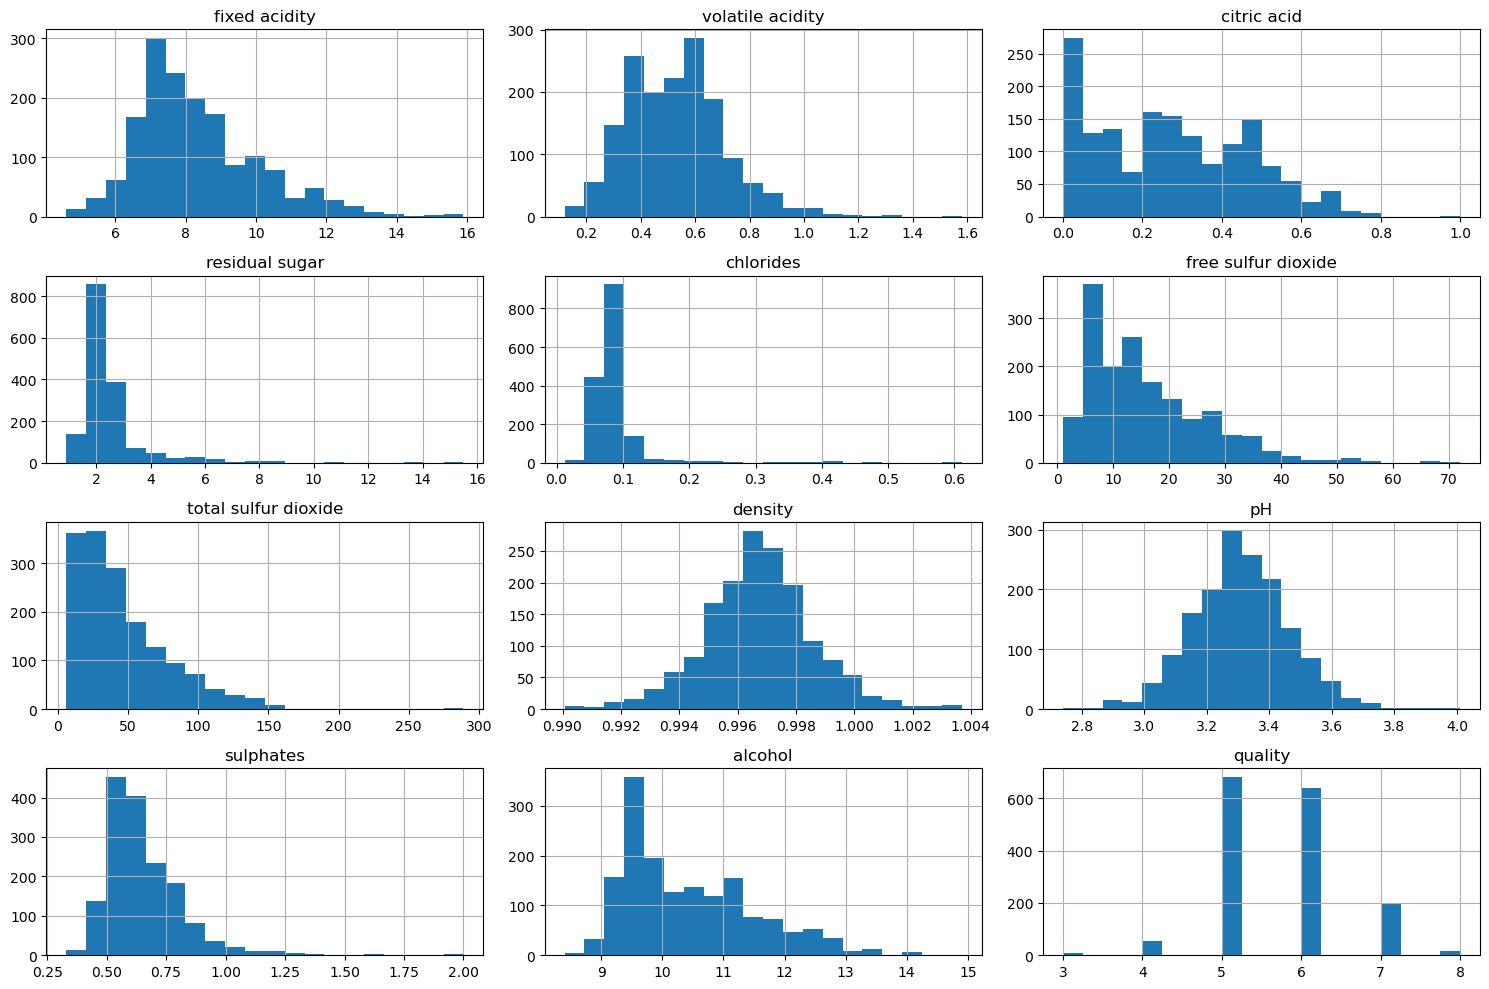

In [4]:
# Plot histograms of all features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


fixed acidity: Statistics=0.9420264959335327, p=1.5227779442162196e-24


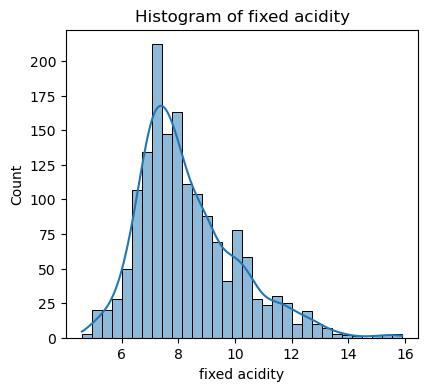

volatile acidity: Statistics=0.9743338823318481, p=2.686385373947307e-16


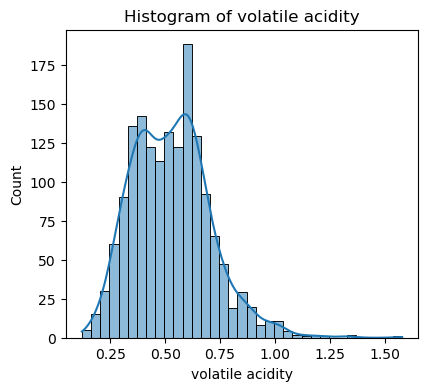

citric acid: Statistics=0.955294668674469, p=1.0233944777578548e-21


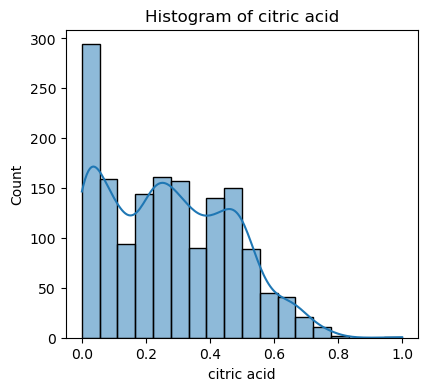

residual sugar: Statistics=0.5660766363143921, p=0.0


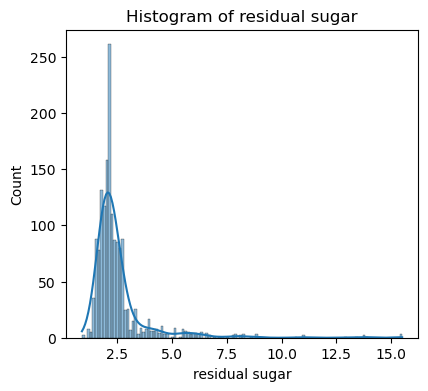

chlorides: Statistics=0.4842468500137329, p=0.0


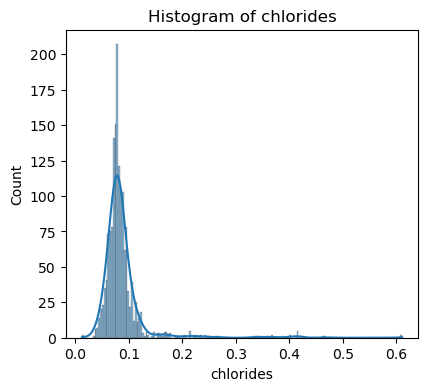

free sulfur dioxide: Statistics=0.9018418192863464, p=7.699692533903026e-31


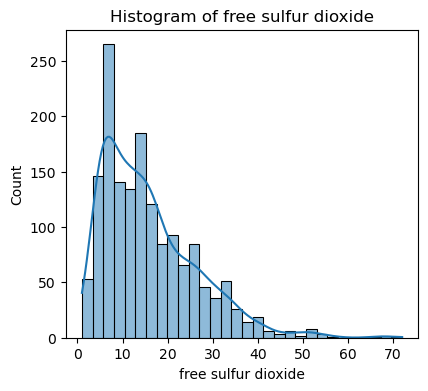

total sulfur dioxide: Statistics=0.8732250332832336, p=3.573768919849872e-34


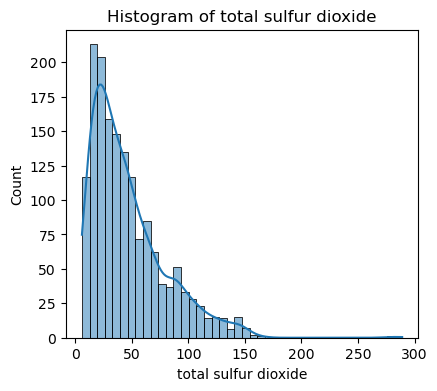

density: Statistics=0.9908602237701416, p=1.9199848821926935e-08


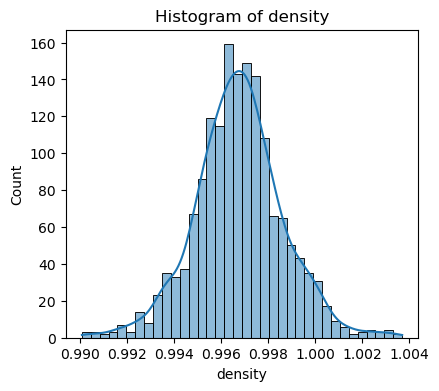

pH: Statistics=0.9934892654418945, p=1.7218767425219994e-06


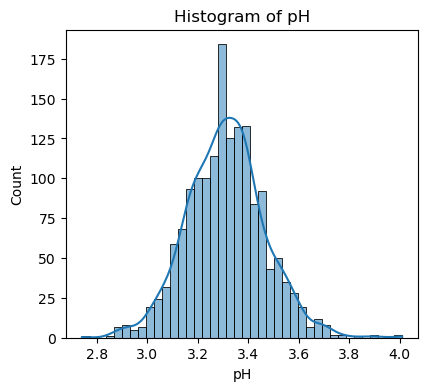

sulphates: Statistics=0.8330425024032593, p=5.821617678881608e-38


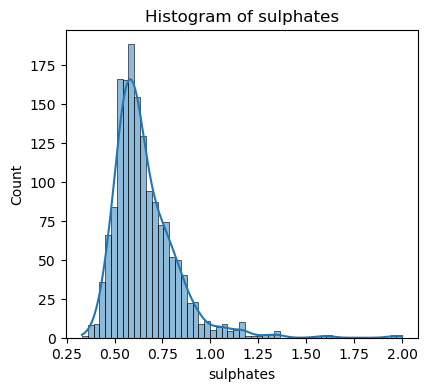

alcohol: Statistics=0.9288375377655029, p=6.63998167657323e-27


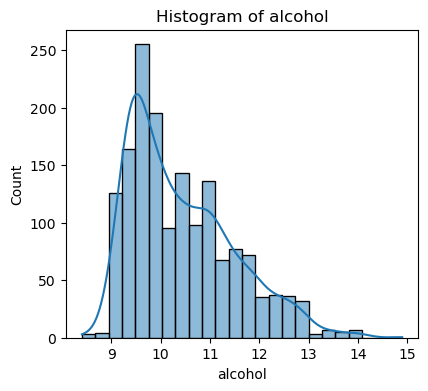

quality: Statistics=0.8575938940048218, p=9.524199756965729e-36


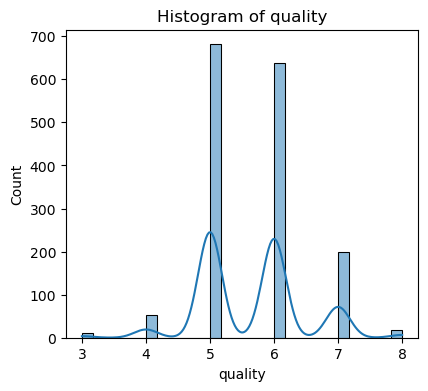

In [5]:
from scipy.stats import shapiro

# Function to plot histogram and perform Shapiro-Wilk test
def plot_distribution_and_test(data, feature):
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    # Shapiro-Wilk test
    stat, p = shapiro(data[feature])
    print(f'{feature}: Statistics={stat}, p={p}')

    plt.show()

# List of features to check
features = df.columns

# Plot distribution and test for each feature
for feature in features:
    plot_distribution_and_test(df, feature)


sqrt_fixed_acidity: Statistics=0.9677237272262573, p=1.9641914429099894e-18


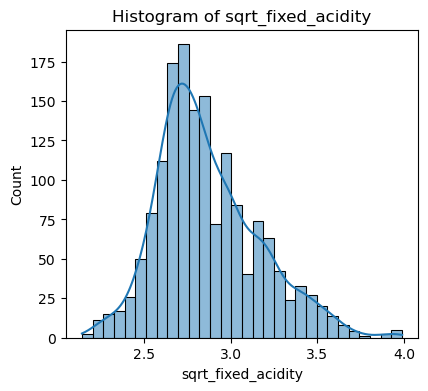

In [6]:
# Apply square root transformation
df['sqrt_fixed_acidity'] = np.sqrt(df['fixed acidity'])
plot_distribution_and_test(df, 'sqrt_fixed_acidity')


fixed acidity: Statistics=0.9420264959335327, p=1.5227779442162196e-24


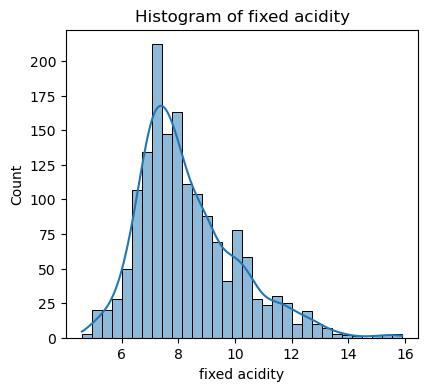

log_fixed_acidity: Statistics=0.9819320440292358, p=2.6527884706625815e-13


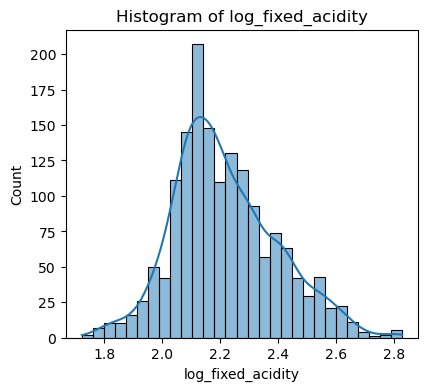

sqrt_fixed_acidity: Statistics=0.9677237272262573, p=1.9641914429099894e-18


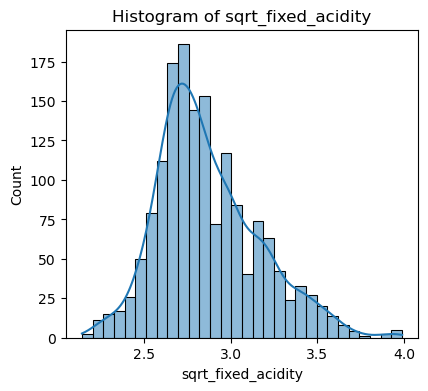

boxcox_fixed_acidity: Statistics=0.993341863155365, p=1.3079226164336433e-06


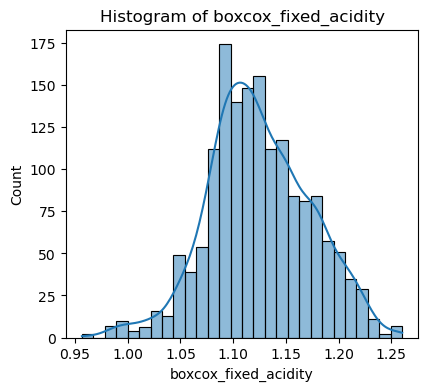

Lambda for Box-Cox transformation: -0.6686166360918417


In [7]:
# Initial Distribution
plot_distribution_and_test(df, 'fixed acidity')

# Log Transformation
df['log_fixed_acidity'] = np.log1p(df['fixed acidity'])
plot_distribution_and_test(df, 'log_fixed_acidity')

# Square Root Transformation
df['sqrt_fixed_acidity'] = np.sqrt(df['fixed acidity'])
plot_distribution_and_test(df, 'sqrt_fixed_acidity')

# Box-Cox Transformation
df['boxcox_fixed_acidity'], fitted_lambda = boxcox(df['fixed acidity'])
plot_distribution_and_test(df, 'boxcox_fixed_acidity')
print(f'Lambda for Box-Cox transformation: {fitted_lambda}')


**[Q6]Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?**

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')

# Separate the features and the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


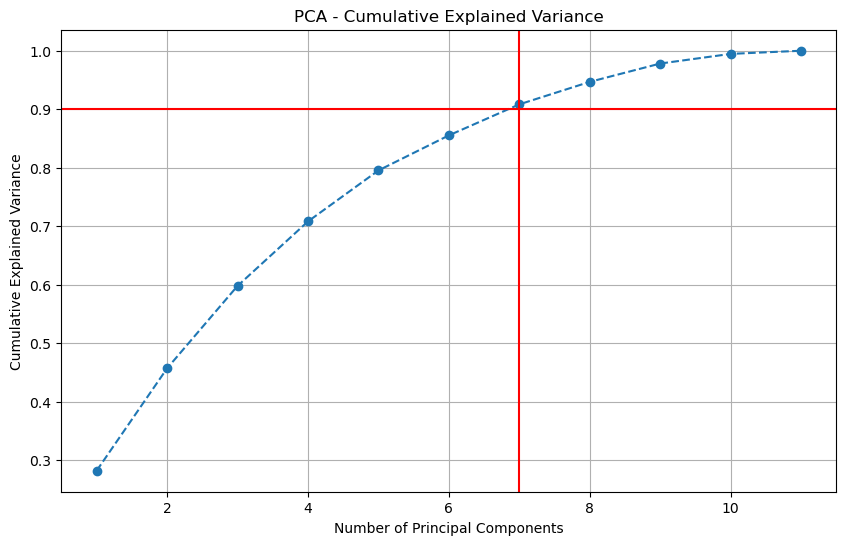

In [9]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axvline(x=np.where(cumulative_variance >= 0.9)[0][0] + 1, color='r', linestyle='-')
plt.grid()
plt.show()


In [10]:
# Find the number of components needed to explain 90% of the variance
n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1
print(f'Minimum number of principal components to explain 90% of the variance: {n_components_90}')


Minimum number of principal components to explain 90% of the variance: 7
